In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from tqdm.notebook import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [11]:
TEST_IMAGES_DIR = 'images/test/'
TRAIN_IMAGES_DIR = 'images/train/'

In [3]:
labels = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6,
}

In [29]:
def load_train_images(TRAIN_IMAGES_DIR: str, X_train: list, y_train: list):
    for root, dirs, files in os.walk(TEST_IMAGES_DIR):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                label_dir = file_path.split('\\')[-2]
                image_label = labels[str(label_dir.split('/')[-1])]
                image = cv2.imread(file_path)
                image = cv2.resize(image, (48, 48))
                image = image / 255.0
                X_train.append(image)
                y_train.append(image_label)
    return X_train,y_train

In [30]:
def load_test_images(TEST_IMAGES_DIR: str, X_test: list, y_test: list):
    for root, dirs, files in os.walk(TEST_IMAGES_DIR):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                label_dir = file_path.split('\\')[-2]
                image_label = labels[str(label_dir.split('/')[-1])]
                image = cv2.imread(file_path)
                image = cv2.resize(image, (48, 48))
                image = image / 255.0
                X_test.append(image)
                y_test.append(image_label)
    return X_test,y_test

In [31]:
X_train, y_train = load_train_images(TRAIN_IMAGES_DIR, [], [])
X_test, y_test = load_test_images(TEST_IMAGES_DIR, [], [])

In [33]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7066, 48, 48, 3), (7066,), (7066, 48, 48, 3), (7066,))

Text(0.5, 1.0, '4')

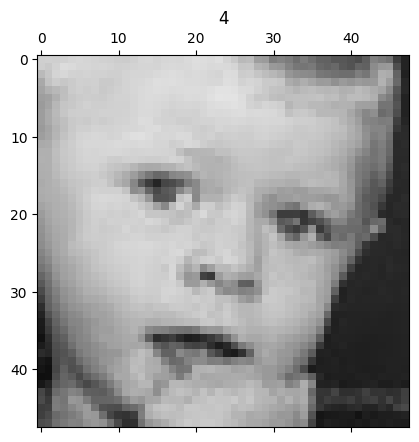

In [38]:
plt.matshow(X_train[4000] , cmap = 'gray')
plt.title(y_train[4000])

In [44]:
y_train = keras.utils.to_categorical(y_train, num_classes=7)

In [50]:
model = Sequential([
    # layer 1
    Conv2D(filters=32, kernel_size=(3, 3),
           input_shape=(48, 48, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # layer 2
    Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # layer 3
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # layer 4
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # flatten
    Flatten(),

    # FC 1
    Dense(128, activation='relu'),
    Dropout(0.2),
    # FC 2
    Dense(64, activation='relu'),
    Dropout(0.2),
    # FC 3
    Dense(32, activation='relu'),
    Dropout(0.2),
    # Output
    Dense(7, activation='softmax'),
])

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 50)     │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        28,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,145 (566.97 KB)

 Trainable params: 145,145 (566.97 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [54]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4435 - loss: 1.4121
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4682 - loss: 1.3761
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4867 - loss: 1.3094
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5090 - loss: 1.2821
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5325 - loss: 1.2280
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5476 - loss: 1.1844
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5652 - loss: 1.1233
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5743 - loss: 1.0832
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5992 - loss: 1.0178
Epoch 10/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6159 - loss: 0.9834
Epoch 11/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6462 - loss: 0.9519
Epoch 12/100
221/221 ━━━━━━━━━

In [56]:
y_test = keras.utils.to_categorical(y_test, num_classes=7)
model.evaluate(X_test, y_test)

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9620 - loss: 0.1027


[0.08071894943714142, 0.9699971675872803]

In [57]:
y_pred = model.predict(X_test)

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [59]:
y_pred = np.argmax(y_pred,axis=1)

In [64]:
# convert from categorical to numerical
y_test = np.argmax(y_test,axis=1)

In [67]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.9699981130675197

In [68]:
precision_score(y_test, y_pred, average='weighted')

0.9703264227325595

In [69]:
recall_score(y_test, y_pred, average='weighted')

0.9699971695442966

In [70]:
accuracy_score(y_test, y_pred)

0.9699971695442966

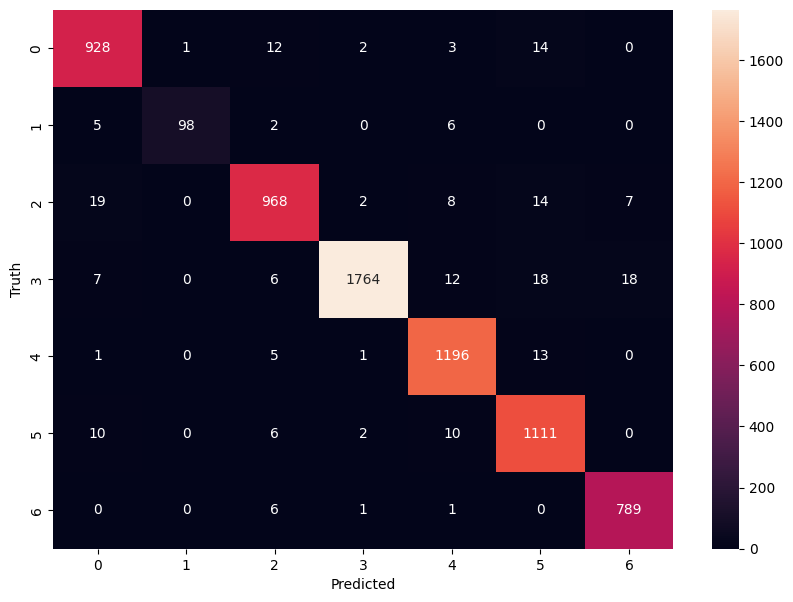

In [71]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [72]:
keras.models.save_model(model,'FACE_REG_MODEL.keras')